In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score,mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV ,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression ,Ridge


In [9]:
Data = pd.read_excel("/content/Judgment_Embeddings_InLegalBERT (1).xlsx")

# Define features (X) and target variable (y)
X = Data.iloc[:, 1:10]  # Selecting all rows, and columns 1 to 9 (features)
y = Data["Label"]        # Target variable

# Splitting dataset into training and testing sets (30% test size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train KNN model
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

# Predictions
y_train_pred = neigh.predict(X_train)
y_test_pred = neigh.predict(X_test)

# Confusion matrices
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Compute precision, recall, and f1-score using sklearn functions
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print results
print("Training Data:")
print("Precision\tRecall\t\tF1-Score")
print(f"{train_precision:.2f}\t\t{train_recall:.2f}\t\t{train_f1:.2f}")

print("\nTesting Data:")
print("Precision\tRecall\t\tF1-Score")
print(f"{test_precision:.2f}\t\t{test_recall:.2f}\t\t{test_f1:.2f}")


Training Data:
Precision	Recall		F1-Score
0.65		0.65		0.61

Testing Data:
Precision	Recall		F1-Score
0.39		0.46		0.41


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
# Load data
file_path = "Lab Session Data.xlsx"
sheet_name = "Purchase data"
columns = "A:E"
data = pd.read_excel(file_path, sheet_name=sheet_name, usecols=columns)
data = data.dropna(how='all')  # Remove empty rows

# Features and Target
features = data[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].to_numpy()
target = data['Payment (Rs)'].to_numpy().astype(float)  # Convert target to float

# Train-Test Split (50%-50%)
train_features, test_features, train_target, test_target = train_test_split(
    features, target, test_size=0.5, random_state=42
)

# Train Linear Regression Model
regressor = LinearRegression()
regressor.fit(train_features, train_target)

# Predictions
predictions = regressor.predict(test_features)

# Compute R² Score
r2_score_initial = r2_score(test_target, predictions)

# Handle overfitting using Ridge Regression if R² is too high
if r2_score_initial > 0.98:
    print("Model is overfitting. Applying Ridge Regression for regularization.")
    regressor = Ridge(alpha=1.0)  # Apply L2 Regularization
    regressor.fit(train_features, train_target)
    predictions = regressor.predict(test_features)
    r2_score_final = r2_score(test_target, predictions)
else:
    r2_score_final = r2_score_initial

# Compute Evaluation Metrics
mse = mean_squared_error(test_target, predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_target - predictions) / test_target)) * 100

# Display Results
print("\nRegression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R² Score: {r2_score_final:.4f}")


Model is overfitting. Applying Ridge Regression for regularization.

Regression Model Evaluation:
Mean Squared Error (MSE): 160.9304
Root Mean Squared Error (RMSE): 12.6858
Mean Absolute Percentage Error (MAPE): 3.33%
R² Score: 0.9787


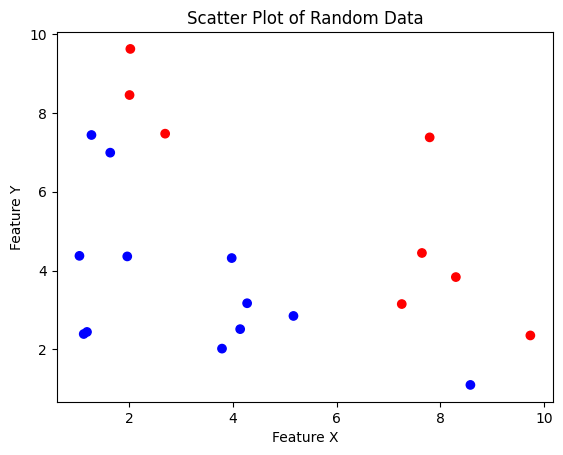

In [16]:
# Generate random data
X = np.random.uniform(1, 10, 20)
Y = np.random.uniform(1, 10, 20)

# Assign class values based on X and Y sum
classes = np.array([1 if x + y > 10 else 0 for x, y in zip(X, Y)])

# Assign colors based on class
colors = np.array(['blue', 'red'])[classes]

# Scatter plot
plt.scatter(X, Y, c=colors)
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.title("Scatter Plot of Random Data")
plt.show()

<ipython-input-19-b85a1f2c29d1>:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


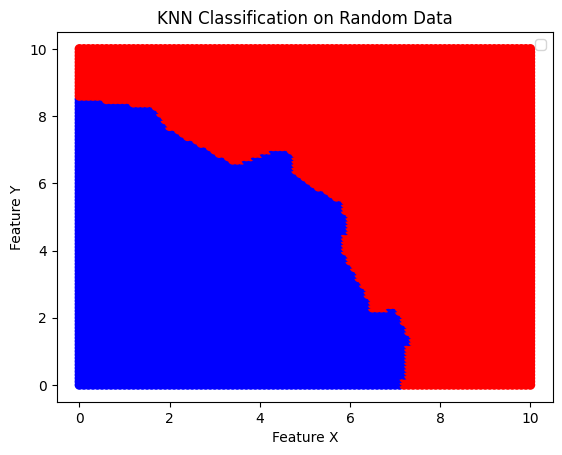

In [19]:
train_data = np.column_stack((X, Y))

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(train_data, classes)

# Generate test data (grid of points)
x_range = np.arange(0, 10.1, 0.1)
y_range = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(x_range, y_range)  # Create a grid
test_points = np.c_[X_test.ravel(), Y_test.ravel()]  # Reshape for prediction

# Predict classes for test data
test_classes = knn_model.predict(test_points)

# Assign colors based on class predictions
colors = np.array(['blue', 'red'])[test_classes]

# Scatter plot
plt.scatter(test_points[:, 0], test_points[:, 1], c=colors)

plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.title("KNN Classification on Random Data")
plt.legend()
plt.show()


<ipython-input-48-ffe49eb0d5db>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap("tab10", num_classes)  # Get a color map


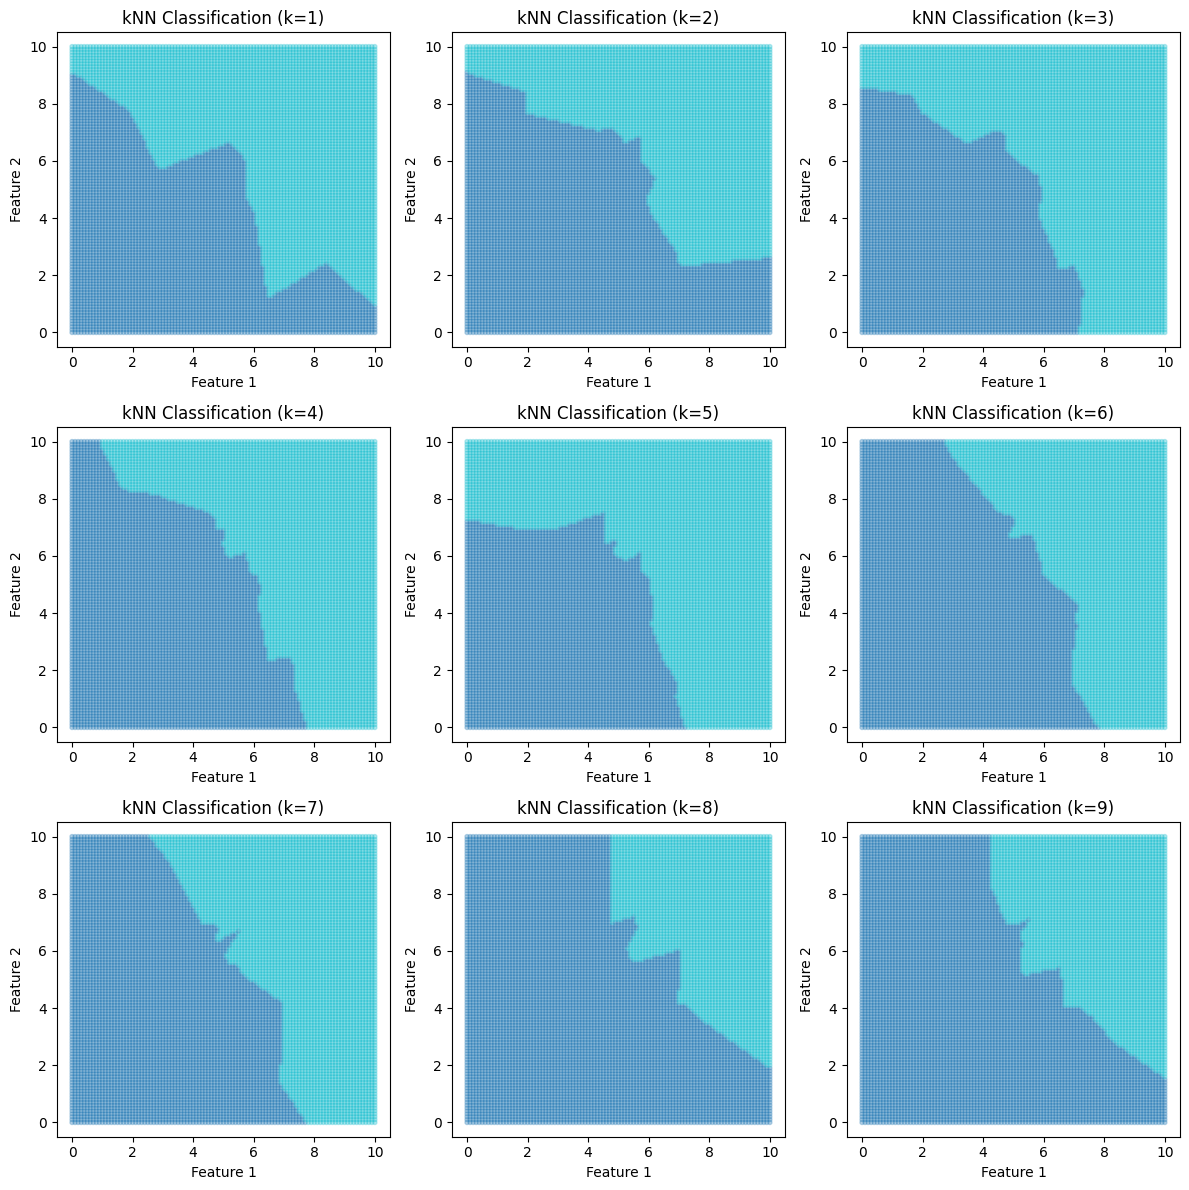

In [48]:
def plot_scatter(x_values, y_values, point_colors, title):
    plt.scatter(x_values, y_values, c=point_colors, marker='.', alpha=0.3)
    plt.xlabel("Feature X")
    plt.ylabel("Feature Y")
    plt.title(title)

# kNN Classification Function
def perform_knn_classification(k_neighbors, train_features, train_labels, test_samples):
    unique_labels = np.unique(train_labels)  # Get all unique class labels
    num_classes = len(unique_labels)  # Count unique classes

    color_map = plt.cm.get_cmap("tab10", num_classes)  # Get a color map
    class_colors = [color_map(i) for i in range(num_classes)]  # Assign colors to classes

    plt.figure(figsize=(12, 12))

    for i, k in enumerate(k_neighbors, 1):
        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(train_features, train_labels)

        predicted_labels = knn_model.predict(test_samples)

        # Map predicted labels to colors using dictionary
        label_to_color = {label: class_colors[idx] for idx, label in enumerate(unique_labels)}
        predicted_colors = [label_to_color[label] for label in predicted_labels]

        plt.subplot(3, 3, i)
        plt.scatter(test_samples[:, 0], test_samples[:, 1], c=predicted_colors, marker='.', alpha=0.3)
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.title(f"kNN Classification (k={k})")

    plt.tight_layout()
    plt.show()


k_neighbors = list(range(1, 10))


x_range = np.arange(0, 10.1, 0.1)
y_range = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(x_range, y_range)
test_samples = np.c_[X_test.ravel(), Y_test.ravel()]
perform_knn_classification(k_neighbors, train_data,classes, test_samples)


<ipython-input-48-ffe49eb0d5db>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap("tab10", num_classes)  # Get a color map


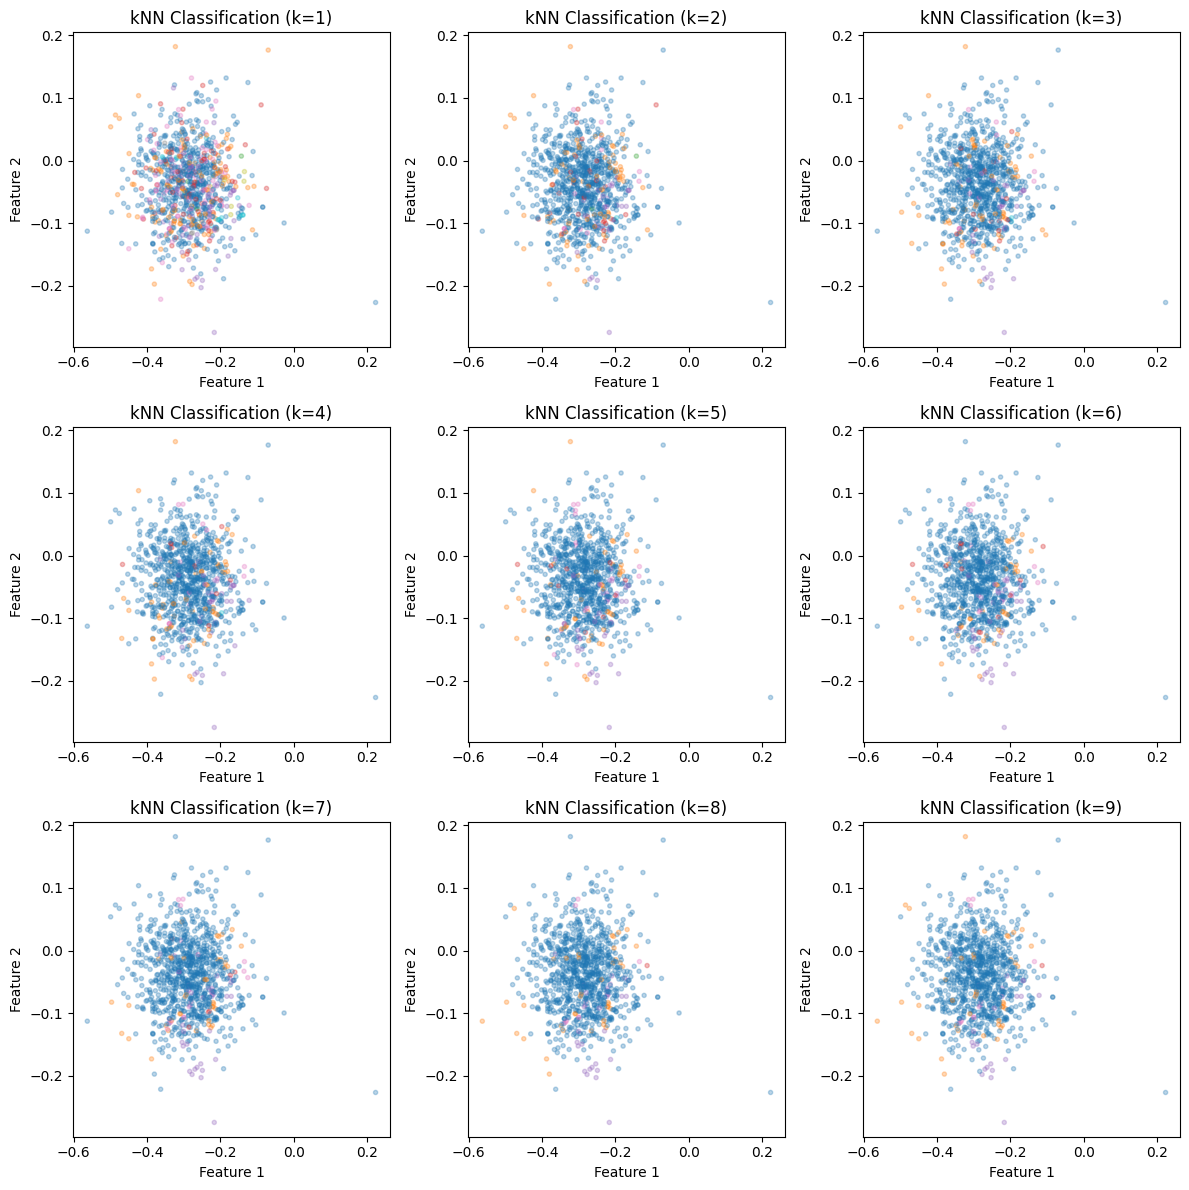

In [52]:

# Selecting two specific features and target variable
X = Data.loc[:, ['feature_0', 'feature_1']].values  # Selecting only two features
y = Data["Label"].values  # Target variable


# Splitting dataset into training and testing sets (30% test size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

k_neighbors = list(range(1, 10))

perform_knn_classification(k_neighbors, X_train, y_train,X_test)


In [29]:
k_values_grid = {'n_neighbors': list(range(1, 11))}

knn_model = KNeighborsClassifier()

grid_search_knn = GridSearchCV(knn_model, k_values_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(train_data, classes)

print(f"Optimal k (GridSearch): {grid_search_knn.best_params_['n_neighbors']}")

random_search_knn = RandomizedSearchCV(knn_model, k_values_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search_knn.fit(train_data, classes)

print(f"Optimal k (RandomSearch): {random_search_knn.best_params_['n_neighbors']}")


Optimal k (GridSearch): 1
Optimal k (RandomSearch): 1
